In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

cust_data=pd.read_csv("/kaggle/input/zeotap/Customers.csv")
prod_data=pd.read_csv("/kaggle/input/zeotap/Products.csv")
tran_data=pd.read_csv("/kaggle/input/zeotap/Transactions.csv")
sep="_"*100
data_list=[cust_data,prod_data,tran_data ]#list of all the data 

In [39]:
#understand data and its structure
for data in data_list:
    print(f" Customer data info:\n {sep}\n" )
    print(data.describe())
    data.info()
    


 Customer data info:
 ____________________________________________________________________________________________________

       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
 Customer data info:
 ____________________________________________________________________________________________________

            Price
count  100.000000
mean 

In [40]:
# Check for duplicates in each dataset
for i, data in enumerate(data_list, start=1):
    print(f"\nDataset {i}: {data.shape[0]} rows, {data.shape[1]} columns")
    duplicate_count = data.duplicated().sum()
    if duplicate_count > 0:
        print(f"Duplicates found: {duplicate_count}")
    else:
        print("No duplicates found.")



Dataset 1: 200 rows, 4 columns
No duplicates found.

Dataset 2: 100 rows, 4 columns
No duplicates found.

Dataset 3: 1000 rows, 7 columns
No duplicates found.


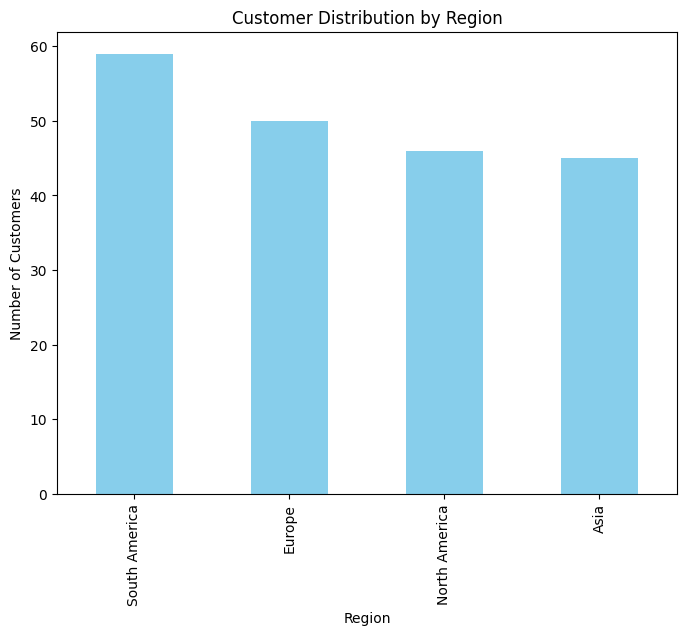

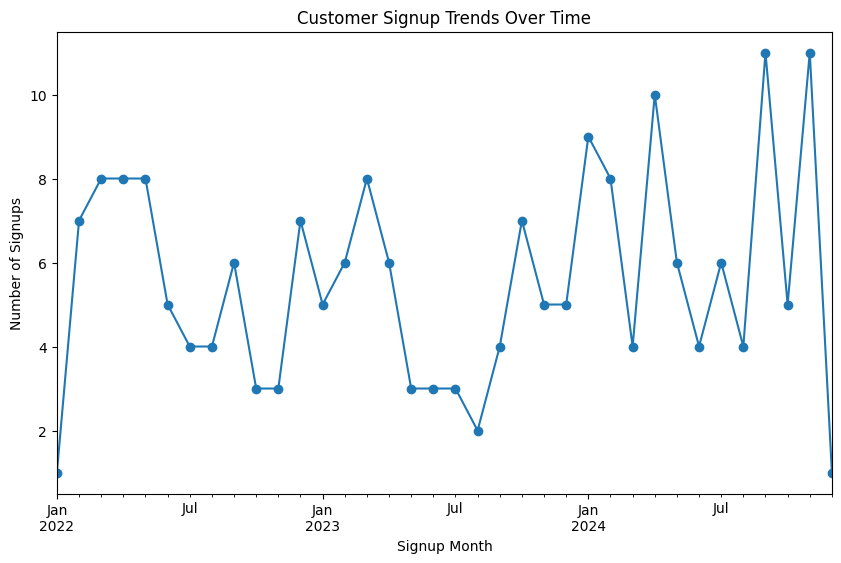

Total Unique Customers: 200


In [41]:
# Customer distribution by region
region_counts = cust_data['Region'].value_counts()

region_counts.plot(kind='bar', title='Customer Distribution by Region', color='skyblue', figsize=(8, 6))
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

# Signup trends over time
cust_data['SignupDate'] = pd.to_datetime(cust_data['SignupDate'])
signup_trends = cust_data['SignupDate'].dt.to_period('M').value_counts().sort_index()
signup_trends.plot(kind='line', title='Customer Signup Trends Over Time', marker='o', figsize=(10, 6))
plt.xlabel('Signup Month')
plt.ylabel('Number of Signups')
plt.show()

# Unique customers
print(f"Total Unique Customers: {cust_data['CustomerID'].nunique()}")


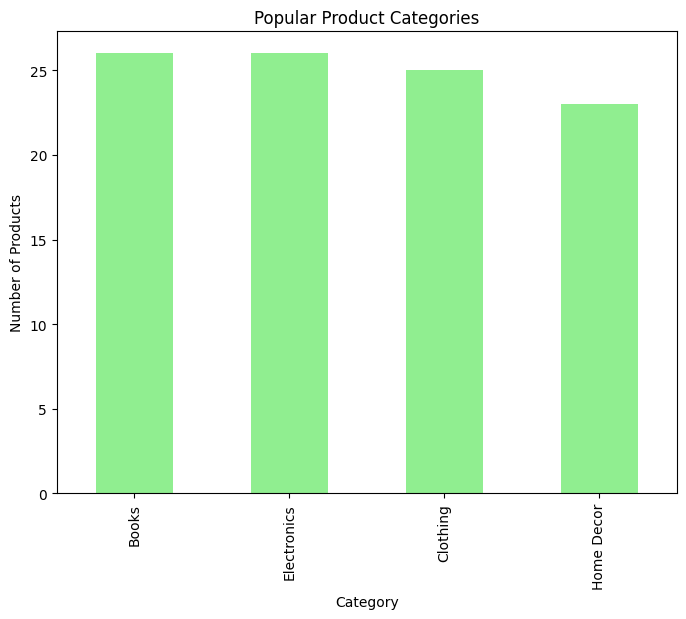

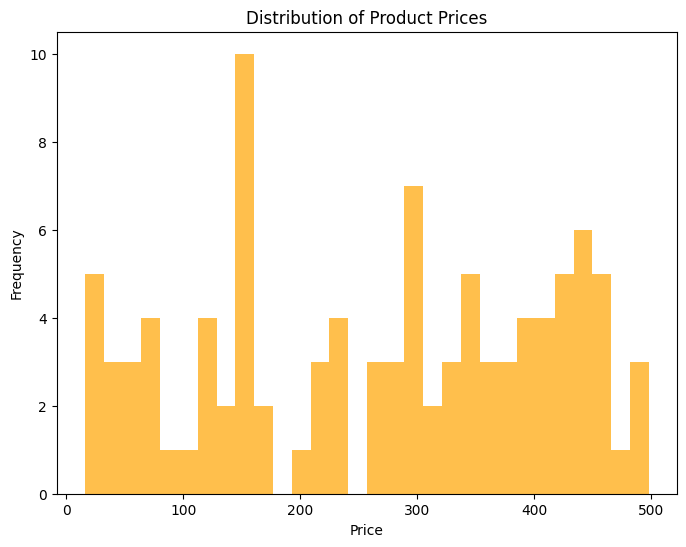

count    100.000000
mean     267.551700
std      143.219383
min       16.080000
25%      147.767500
50%      292.875000
75%      397.090000
max      497.760000
Name: Price, dtype: float64


In [42]:
# Popular product categories
category_counts = prod_data['Category'].value_counts()
category_counts.plot(kind='bar', title='Popular Product Categories', color='lightgreen', figsize=(8, 6))
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.show()

# Distribution of product prices
prod_data['Price'].plot(kind='hist', bins=30, color='orange', alpha=0.7, figsize=(8, 6))
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Basic stats
print(prod_data['Price'].describe())


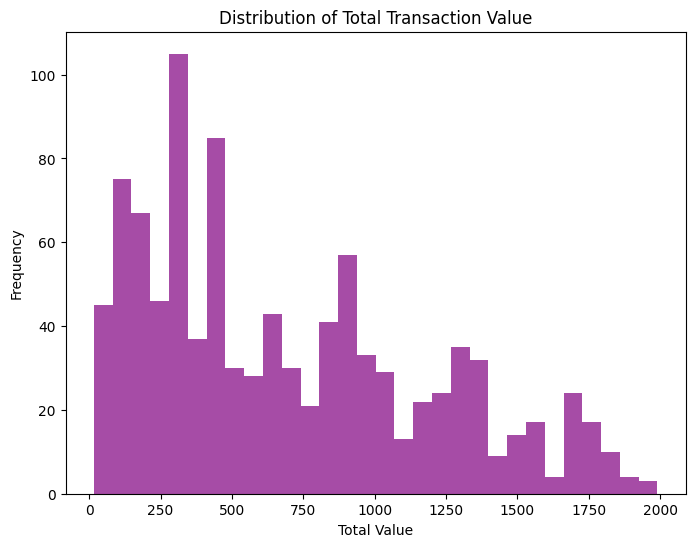

Total Product Types: 100


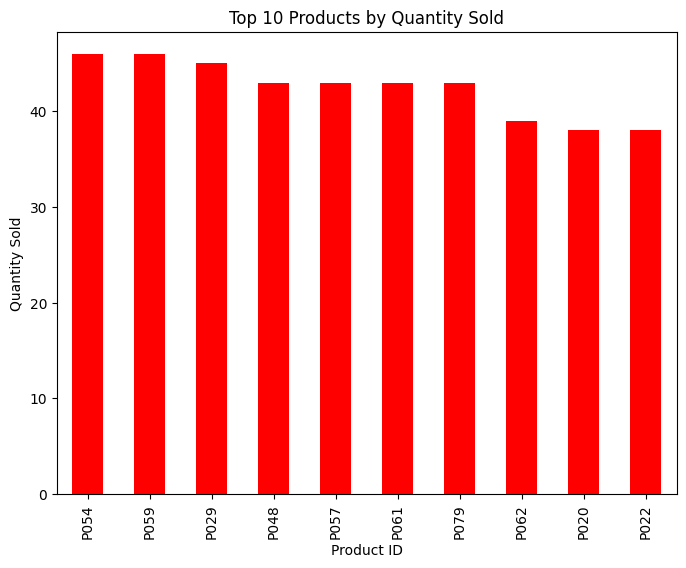

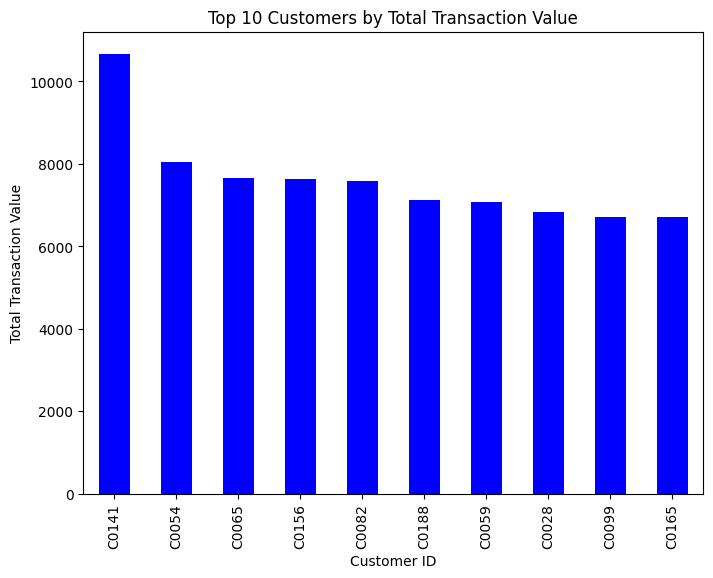

In [43]:
# Total transaction value distribution
tran_data['TotalValue'].plot(kind='hist', bins=30, color='purple', alpha=0.7, figsize=(8, 6))
plt.title('Distribution of Total Transaction Value')
plt.xlabel('Total Value')
plt.ylabel('Frequency')
plt.show()

# Product sales trends
print(f"Total Product Types: {tran_data['ProductID'].value_counts().size}")
top_products = tran_data.groupby('ProductID')['Quantity'].sum().nlargest(10)
top_products.plot(kind='bar', title='Top 10 Products by Quantity Sold', color='red', figsize=(8, 6))
plt.xlabel('Product ID')
plt.ylabel('Quantity Sold')
plt.show()

# Relationship between customers and transactions
top_customers = tran_data.groupby('CustomerID')['TotalValue'].sum().nlargest(10)
top_customers.plot(kind='bar', title='Top 10 Customers by Total Transaction Value', color='blue', figsize=(8, 6))
plt.xlabel('Customer ID')
plt.ylabel('Total Transaction Value')
plt.show()


In [44]:
# Merge transactions with products
transactions_products = pd.merge(tran_data, prod_data, on='ProductID', how='left')

# Merge with customers
full_data = pd.merge(transactions_products, cust_data, on='CustomerID', how='left')

# Display the first few rows of the combined dataset
print(full_data.describe())


          Quantity   TotalValue     Price_x     Price_y  \
count  1000.000000  1000.000000  1000.00000  1000.00000   
mean      2.537000   689.995560   272.55407   272.55407   
min       1.000000    16.080000    16.08000    16.08000   
25%       2.000000   295.295000   147.95000   147.95000   
50%       3.000000   588.880000   299.93000   299.93000   
75%       4.000000  1011.660000   404.40000   404.40000   
max       4.000000  1991.040000   497.76000   497.76000   
std       1.117981   493.144478   140.73639   140.73639   

                          SignupDate  
count                           1000  
mean   2023-07-09 02:49:55.199999744  
min              2022-01-22 00:00:00  
25%              2022-09-17 12:00:00  
50%              2023-07-23 00:00:00  
75%              2024-04-12 00:00:00  
max              2024-12-28 00:00:00  
std                              NaN  


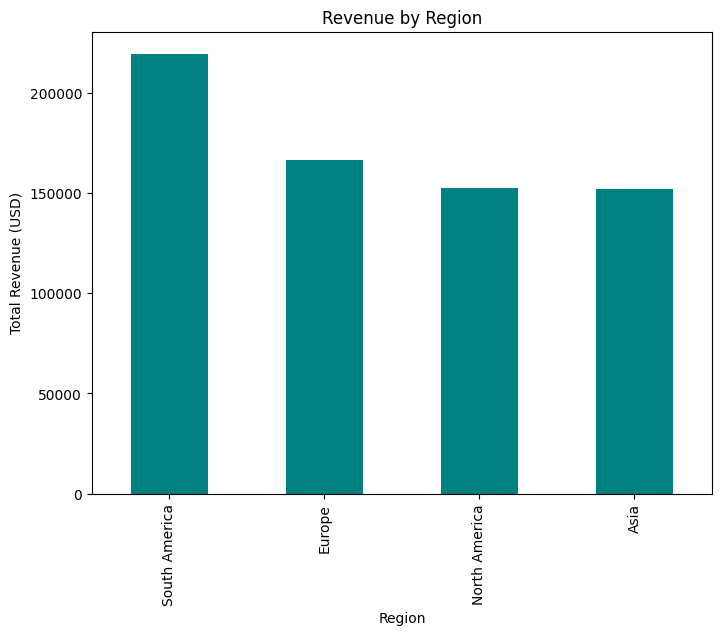

In [45]:
# Revenue by region
region_revenue = full_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
region_revenue.plot(kind='bar', title='Revenue by Region', color='teal', figsize=(8, 6))
plt.xlabel('Region')
plt.ylabel('Total Revenue (USD)')
plt.show()


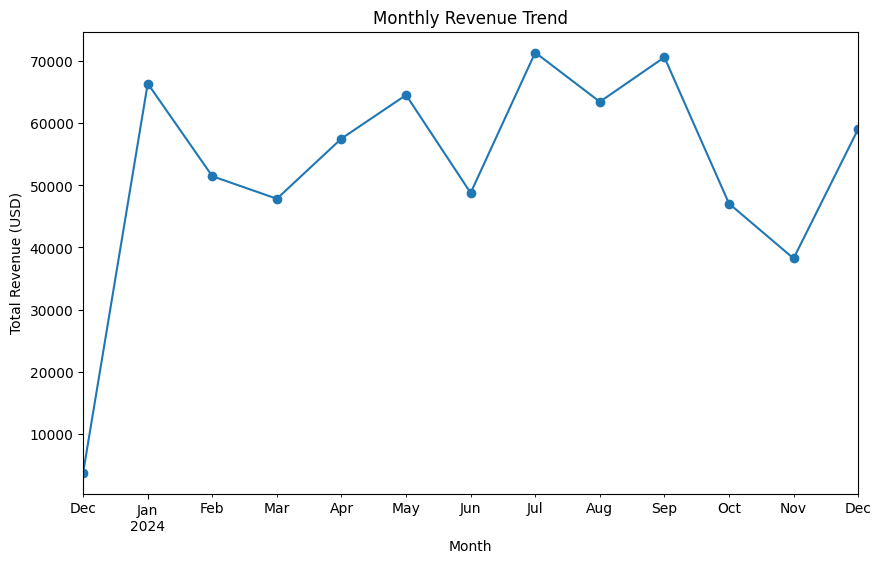

In [46]:
# Convert transaction date to datetime
full_data['TransactionDate'] = pd.to_datetime(full_data['TransactionDate'])

# Group by month and calculate revenue
monthly_revenue = full_data.groupby(full_data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
monthly_revenue.plot(kind='line', title='Monthly Revenue Trend', marker='o', figsize=(10, 6))
plt.xlabel('Month')
plt.ylabel('Total Revenue (USD)')
plt.show()


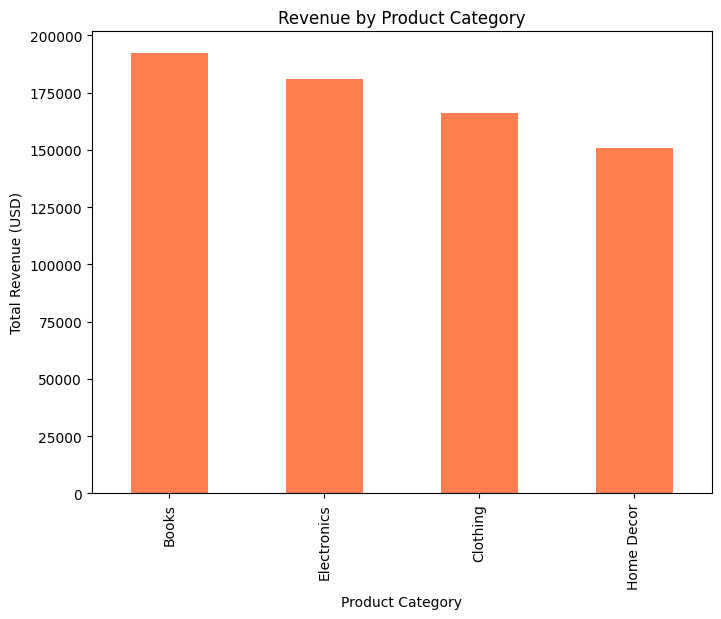

In [47]:
# Revenue by category
category_revenue = full_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
category_revenue.plot(kind='bar', title='Revenue by Product Category', color='coral', figsize=(8, 6))
plt.xlabel('Product Category')
plt.ylabel('Total Revenue (USD)')
plt.show()


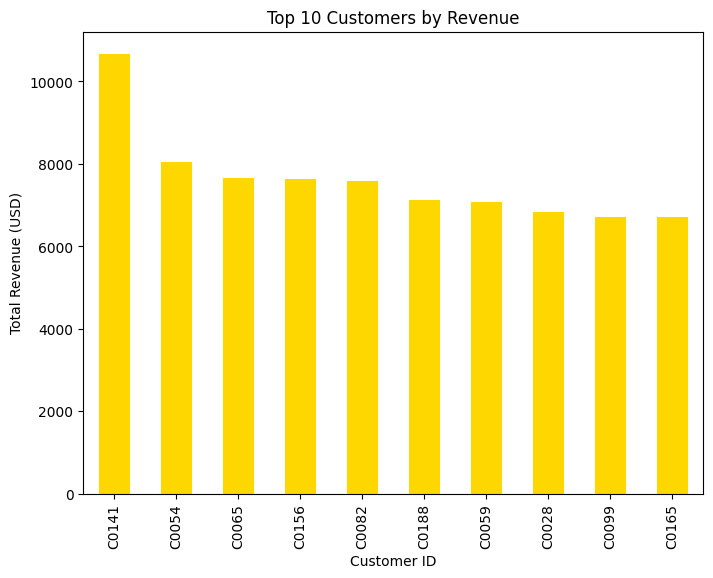

In [48]:
# Top 10 customers by revenue
top_customers = full_data.groupby('CustomerID')['TotalValue'].sum().nlargest(10)
top_customers.plot(kind='bar', title='Top 10 Customers by Revenue', color='gold', figsize=(8, 6))
plt.xlabel('Customer ID')
plt.ylabel('Total Revenue (USD)')
plt.show()


In [56]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

# Load datasets
customers = pd.read_csv("/kaggle/input/zeotap/Customers.csv")
products = pd.read_csv("/kaggle/input/zeotap/Products.csv")
transactions = pd.read_csv("/kaggle/input/zeotap/Transactions.csv")

# Merge datasets
data = pd.merge(transactions, products, on="ProductID", how="left")
data = pd.merge(data, customers, on="CustomerID", how="left")

# Aggregate customer data (profile and transaction history)
customer_profiles = data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'Price_x': 'mean',
    'Region': 'first',
    'Category': lambda x: ' '.join(x)
}).reset_index()

# Encode categorical data (Region and Category)
customer_profiles = pd.get_dummies(customer_profiles, columns=['Region', 'Category'])

# Scale numerical features
scaler = StandardScaler()
numerical_features = ['TotalValue', 'Quantity', 'Price_x']
customer_profiles[numerical_features] = scaler.fit_transform(customer_profiles[numerical_features])

# Compute similarity matrix
customer_ids = customer_profiles['CustomerID']
features = customer_profiles.drop(columns=['CustomerID'])
similarity_matrix = cosine_similarity(features)

# Generate lookalike recommendations for the first 20 customers
lookalike_results = {}
for idx, customer_id in enumerate(customer_ids[:20]):
    similarity_scores = list(enumerate(similarity_matrix[idx]))
    similar_customers = sorted(similarity_scores, key=lambda x: x[1], reverse=True)[1:4]  # Top 3 similar customers
    lookalike_results[customer_id] = [(customer_ids[i], score) for i, score in similar_customers]

# Save results to Lookalike.csv
lookalike_df = pd.DataFrame([
    {'cust_id': key, 'lookalikes': value} for key, value in lookalike_results.items()
])
lookalike_df['lookalikes'] = lookalike_df['lookalikes'].apply(
    lambda x: [f"({cust_id}, {round(score, 2)})" for cust_id, score in x]
)
lookalike_df.to_csv('Lookalike.csv', index=False)

# Display the first few recommendations
print(lookalike_df)


   cust_id                                     lookalikes
0    C0001   [(C0137, 0.51), (C0191, 0.51), (C0152, 0.5)]
1    C0002  [(C0043, 0.76), (C0097, 0.75), (C0142, 0.72)]
2    C0003  [(C0091, 0.69), (C0190, 0.65), (C0151, 0.64)]
3    C0004  [(C0165, 0.87), (C0113, 0.81), (C0087, 0.77)]
4    C0005  [(C0128, 0.76), (C0080, 0.75), (C0123, 0.75)]
5    C0006    [(C0168, 0.7), (C0187, 0.7), (C0048, 0.67)]
6    C0007  [(C0078, 0.79), (C0115, 0.76), (C0146, 0.74)]
7    C0008  [(C0109, 0.78), (C0068, 0.71), (C0018, 0.69)]
8    C0009   [(C0198, 0.8), (C0061, 0.77), (C0130, 0.72)]
9    C0010  [(C0121, 0.84), (C0060, 0.81), (C0111, 0.81)]
10   C0011  [(C0107, 0.53), (C0006, 0.53), (C0126, 0.52)]
11   C0012  [(C0087, 0.78), (C0102, 0.77), (C0004, 0.76)]
12   C0013  [(C0082, 0.84), (C0188, 0.83), (C0104, 0.83)]
13   C0014  [(C0060, 0.95), (C0097, 0.91), (C0151, 0.86)]
14   C0015  [(C0058, 0.88), (C0020, 0.82), (C0042, 0.78)]
15   C0016  [(C0050, 0.79), (C0185, 0.79), (C0042, 0.77)]
16   C0017  [(